In [1]:
#import important libraries
import numpy as np
import pandas as pd
from pandas import DataFrame

#import statistics libraries
import statistics
from scipy import stats
from statsmodels.formula.api import ols

#import visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#import CSV file
med_data = pd.read_csv("~/Documents/WGU/D208 - Predictive Modeling/medical_clean.csv")

In [3]:
#Removing columns not needed for this exercise
med_data.drop(['Customer_id', 'Interaction', 'UID', 'City', 'State','County', 'Zip', 'Lat', 'Lng', 'TimeZone', 
               'Job','Item1', 'Item2', 'Item3', 'Item4','Item5', 'Item6', 'Item7', 'Item8'], 
               axis=1, 
               inplace=True)

In [4]:
#Checking for Duplicates/Missing Values

print(med_data.duplicated().value_counts())
print("")
print(med_data.isnull().value_counts())
print("")
print(med_data.isna().value_counts())

#Treating outliers
med_data['Population'] = np.where(med_data['Population'] > 75000, np.nan, med_data['Population'])
med_data['Population'].fillna(med_data['Population'].median(), inplace=True)

False    10000
dtype: int64

CaseOrder  Population  Area   Children  Age    Income  Marital  Gender  ReAdmis  VitD_levels  Doc_visits  Full_meals_eaten  vitD_supp  Soft_drink  Initial_admin  HighBlood  Stroke  Complication_risk  Overweight  Arthritis  Diabetes  Hyperlipidemia  BackPain  Anxiety  Allergic_rhinitis  Reflux_esophagitis  Asthma  Services  Initial_days  TotalCharge  Additional_charges
False      False       False  False     False  False   False    False   False    False        False       False             False      False       False          False      False   False              False       False      False     False           False     False    False              False               False   False     False         False        False                 10000
dtype: int64

CaseOrder  Population  Area   Children  Age    Income  Marital  Gender  ReAdmis  VitD_levels  Doc_visits  Full_meals_eaten  vitD_supp  Soft_drink  Initial_admin  HighBlood  Stroke  Complication_risk  Overwe

In [5]:
## Re-expression of Categorical Variables

## Boolean

#Get dummies for boolean (Yes/No) variables
prefix_list = ['ReAdmis', 'HighBlood', 'Diabetes', 'Hyperlipidemia', 
               'Allergic_rhinitis', 'Reflux_esophagitis']
med_data = pd.get_dummies(med_data, 
                          prefix=prefix_list, 
                          prefix_sep='_', 
                          dummy_na=False,
                          drop_first=True,
                          columns=prefix_list)

## Ordinal Categorical

#ordinal encoding via dictionary
med_data['Comp_risk_numeric'] = med_data['Complication_risk']
dict_comp_risk =  {"Comp_risk_numeric": {"Low": 1, "Medium": 2, "High": 3}}
med_data.replace(dict_comp_risk, inplace=True)

#print before & after
print("Comp_risk_numeric unique values are", med_data.Comp_risk_numeric.unique())
print(dict_comp_risk)
print("")

## Nominal Categorical

#get dummy variables
dummies_area = pd.get_dummies(med_data.Area)
dummies_admin = pd.get_dummies(med_data.Initial_admin)
dummies_svc = pd.get_dummies(med_data.Services)

#append new dummy variables to dataset
original_df = med_data
med_data = pd.concat([med_data, 
                      dummies_area, 
                      dummies_admin,
                      dummies_svc], axis='columns')

#show how many new columns/variables
print("Original Rows: ", original_df.shape[0], "Columns: ", original_df.shape[1])
print("New Rows:      ", med_data.shape[0], "Columns: ", med_data.shape[1])

Comp_risk_numeric unique values are [2 3 1]
{'Comp_risk_numeric': {'Low': 1, 'Medium': 2, 'High': 3}}

Original Rows:  10000 Columns:  32
New Rows:       10000 Columns:  42


In [6]:
## A bit of housecleaning on variables

#rename columns
med_data.rename(columns = {'Elective Admission': 'IA_Elective'}, inplace=True)
med_data.rename(columns = {'Emergency Admission': 'IA_Emergency'}, inplace=True)
med_data.rename(columns = {'Observation Admission': 'IA_Observation'}, inplace=True)
med_data.rename(columns = {'Blood Work': 'Service_BW'}, inplace=True)
med_data.rename(columns = {'Intravenous': 'Service_IV'}, inplace=True)
med_data.rename(columns = {'CT Scan': 'Service_CT'}, inplace=True)
med_data.rename(columns = {'MRI': 'Service_MRI'}, inplace=True)
med_data.rename(columns = {'vitD_supp': 'VitD_supp'}, inplace=True)

#update dtype
med_data['Rural'] = med_data['Rural'].astype('int64')
med_data['Suburban'] = med_data['Suburban'].astype('int64')
med_data['Urban'] = med_data['Urban'].astype('int64')
med_data['IA_Elective'] = med_data['IA_Elective'].astype('int64')
med_data['IA_Emergency'] = med_data['IA_Emergency'].astype('int64')
med_data['IA_Observation'] = med_data['IA_Observation'].astype('int64')
med_data['Service_BW'] = med_data['Service_BW'].astype('int64')
med_data['Service_CT'] = med_data['Service_CT'].astype('int64')
med_data['Service_IV'] = med_data['Service_IV'].astype('int64')
med_data['Service_MRI'] = med_data['Service_MRI'].astype('int64')

In [7]:
#Statistical Data for Continuous variables
print(med_data.TotalCharge.describe())
print("")
print(med_data.Additional_charges.describe())
print("")
print(med_data.Income.describe())
print("")
print(med_data.Initial_days.describe())
print("")
print(med_data.Children.describe())
print("")
print(med_data.Age.describe())
print("")
print(med_data.Doc_visits.describe())
print("")
print(med_data.Full_meals_eaten.describe())
print("")
print(med_data.VitD_supp.describe())
print("")
print(med_data.VitD_levels.describe())
print("")

#Statistical Data for Categorical variables
print(med_data.groupby('Area').apply(len))
print("")
print(med_data.groupby('Complication_risk').apply(len))
print("")
print(med_data.groupby('Services').apply(len))
print("")
print(med_data.groupby('Initial_admin').apply(len))
print("")

#Statistical Data for Boolean variables
print(med_data.groupby('ReAdmis_Yes').apply(len))
print("")
print(med_data.groupby('HighBlood_Yes').apply(len))
print("")
print(med_data.groupby('Diabetes_Yes').apply(len))
print("")
print(med_data.groupby('Hyperlipidemia_Yes').apply(len))
print("")
print(med_data.groupby('Allergic_rhinitis_Yes').apply(len))
print("")
print(med_data.groupby('Reflux_esophagitis_Yes').apply(len))

count    10000.000000
mean      5312.172769
std       2180.393838
min       1938.312067
25%       3179.374015
50%       5213.952000
75%       7459.699750
max       9180.728000
Name: TotalCharge, dtype: float64

count    10000.000000
mean     12934.528587
std       6542.601544
min       3125.703000
25%       7986.487755
50%      11573.977735
75%      15626.490000
max      30566.070000
Name: Additional_charges, dtype: float64

count     10000.000000
mean      40490.495160
std       28521.153293
min         154.080000
25%       19598.775000
50%       33768.420000
75%       54296.402500
max      207249.100000
Name: Income, dtype: float64

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

count    10000.000000
mean         2.097200
std          2.163659
min          0.000000
25%          0.000000
50%          1.000000
75%          

In [8]:
model_TotalCharge_all = ols('TotalCharge ~ Additional_charges + Income + Initial_days + Children + Age + Doc_visits + Full_meals_eaten + VitD_levels + VitD_supp + Suburban + Urban + Comp_risk_numeric + Service_IV + Service_CT + Service_MRI + IA_Emergency + IA_Observation + ReAdmis_Yes + HighBlood_Yes + Diabetes_Yes + Hyperlipidemia_Yes + Allergic_rhinitis_Yes + Reflux_esophagitis_Yes', data=med_data).fit()
print(model_TotalCharge_all.summary())

                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.388e+05
Date:                Tue, 27 Aug 2024   Prob (F-statistic):               0.00
Time:                        15:53:29   Log-Likelihood:                -62203.
No. Observations:               10000   AIC:                         1.245e+05
Df Residuals:                    9976   BIC:                         1.246e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1598

In [9]:
## Checking for Multicollinearity

# Import functions
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Get variables for which to compute VIF and add intercept term
X = med_data[['Income', 'Children', 'Age', 'Full_meals_eaten', 'VitD_supp', 'Initial_days', 
              'Comp_risk_numeric', 'ReAdmis_Yes', 'HighBlood_Yes', 'Diabetes_Yes', 
              'Hyperlipidemia_Yes', 'Allergic_rhinitis_Yes', 'Reflux_esophagitis_Yes']]

# Compute and view VIF
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# View results using print
print(vif)

                 variables       VIF
0                   Income  2.764403
1                 Children  1.881612
2                      Age  5.740407
3         Full_meals_eaten  1.919836
4                VitD_supp  1.386853
5             Initial_days  9.181266
6        Comp_risk_numeric  6.337961
7              ReAdmis_Yes  5.605735
8            HighBlood_Yes  1.656197
9             Diabetes_Yes  1.358024
10      Hyperlipidemia_Yes  1.480036
11   Allergic_rhinitis_Yes  1.614292
12  Reflux_esophagitis_Yes  1.659348


In [10]:
model_TotalCharge_reduced = ols('TotalCharge ~ Initial_days + Comp_risk_numeric + IA_Emergency + ReAdmis_Yes + HighBlood_Yes + Diabetes_Yes + Hyperlipidemia_Yes + Allergic_rhinitis_Yes + Reflux_esophagitis_Yes', data=med_data).fit()
print(model_TotalCharge_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 3.547e+05
Date:                Tue, 27 Aug 2024   Prob (F-statistic):               0.00
Time:                        15:53:29   Log-Likelihood:                -62212.
No. Observations:               10000   AIC:                         1.244e+05
Df Residuals:                    9990   BIC:                         1.245e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1592

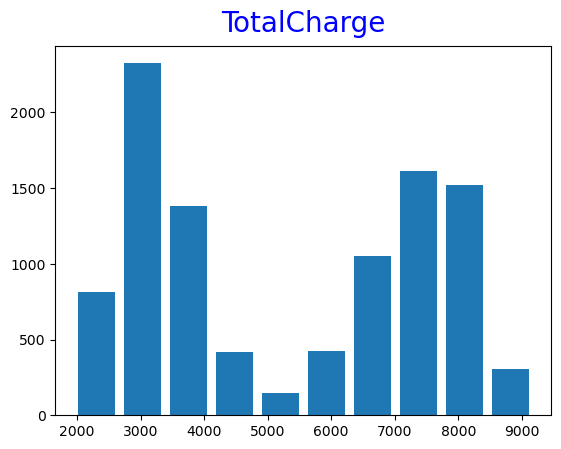

In [11]:
plt.hist(med_data.TotalCharge, rwidth=0.8, bins=10)
plt.title('TotalCharge', fontsize=20, pad=10, color='blue')
plt.show()

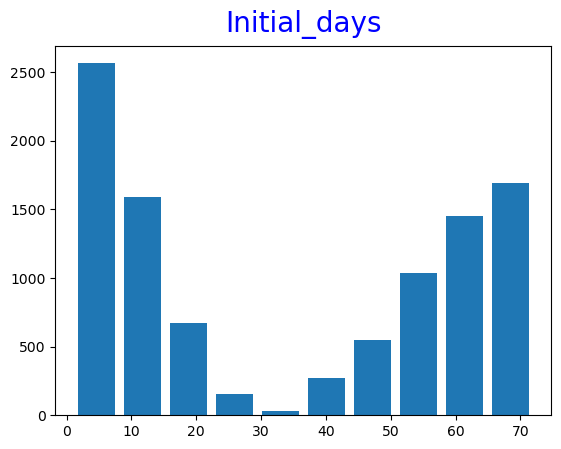

In [12]:
plt.hist(med_data.Initial_days, rwidth=0.8, bins=10)
plt.title('Initial_days', fontsize=20, pad=10, color='blue')
plt.show()

<Axes: xlabel='Area', ylabel='count'>

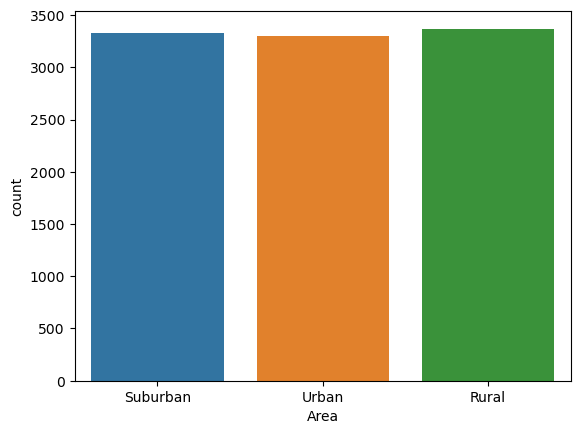

In [13]:
sns.countplot(x='Area', data=med_data)

<Axes: xlabel='Initial_admin', ylabel='count'>

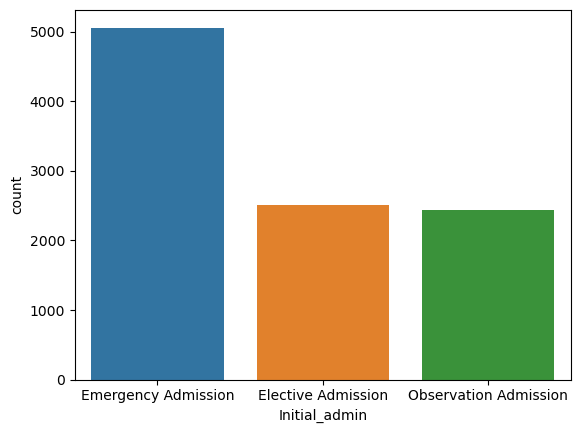

In [14]:
sns.countplot(x='Initial_admin', data=med_data)

<Axes: xlabel='Complication_risk', ylabel='count'>

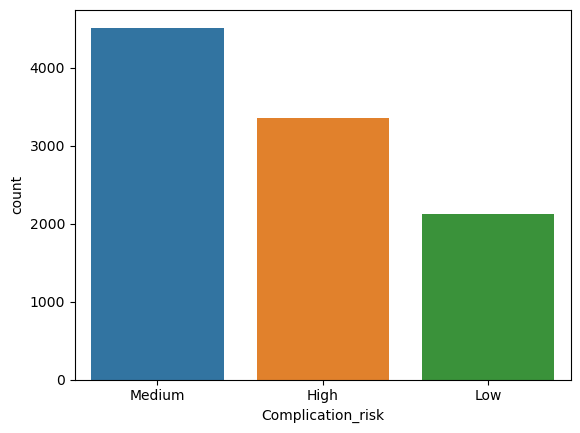

In [15]:
sns.countplot(x='Complication_risk', data=med_data)

<Axes: xlabel='ReAdmis_Yes', ylabel='count'>

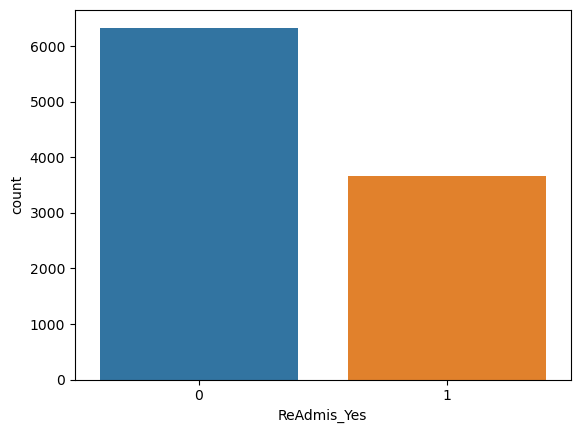

In [16]:
sns.countplot(x='ReAdmis_Yes', data=med_data)

<Axes: xlabel='HighBlood_Yes', ylabel='count'>

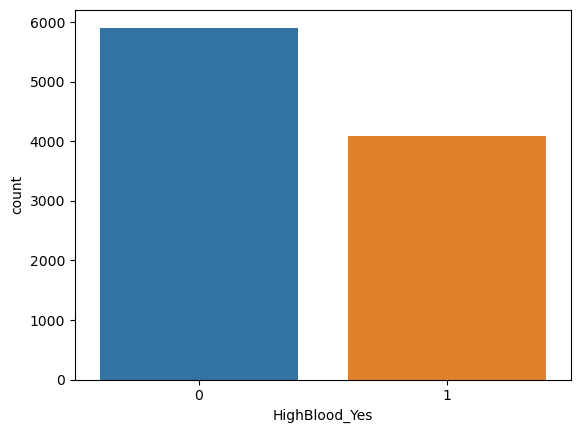

In [17]:
sns.countplot(x='HighBlood_Yes', data=med_data)

<Axes: xlabel='Diabetes_Yes', ylabel='count'>

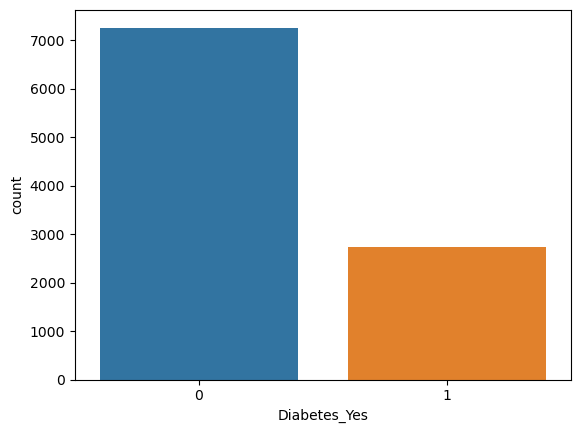

In [18]:
sns.countplot(x='Diabetes_Yes', data=med_data)

<Axes: xlabel='Hyperlipidemia_Yes', ylabel='count'>

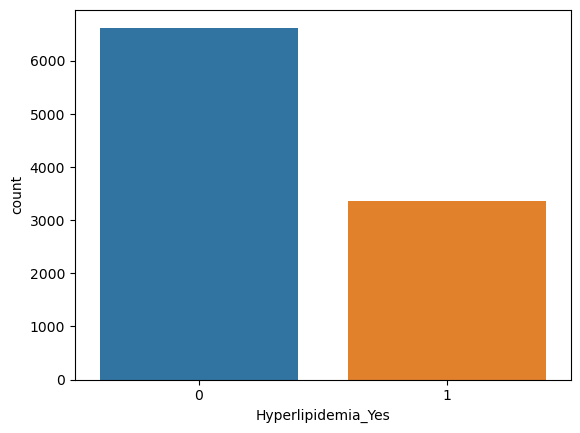

In [19]:
sns.countplot(x='Hyperlipidemia_Yes', data=med_data)

<Axes: xlabel='Allergic_rhinitis_Yes', ylabel='count'>

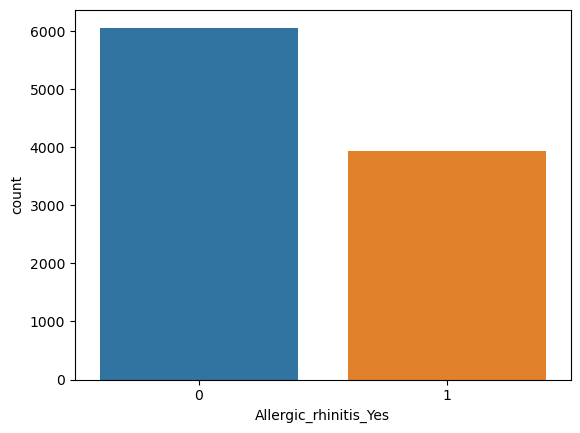

In [20]:
sns.countplot(x='Allergic_rhinitis_Yes', data=med_data)

<Axes: xlabel='Reflux_esophagitis_Yes', ylabel='count'>

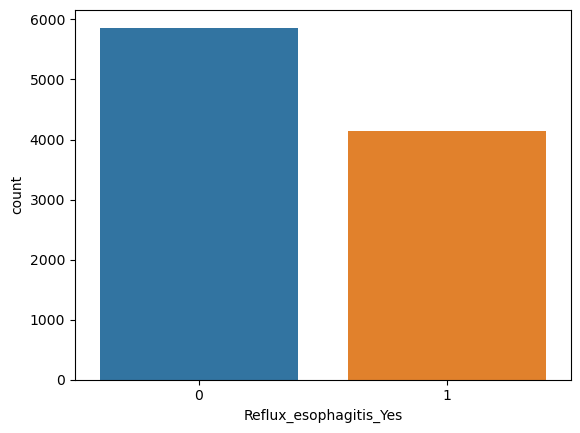

In [21]:
sns.countplot(x='Reflux_esophagitis_Yes', data=med_data)

<Axes: xlabel='Initial_days', ylabel='TotalCharge'>

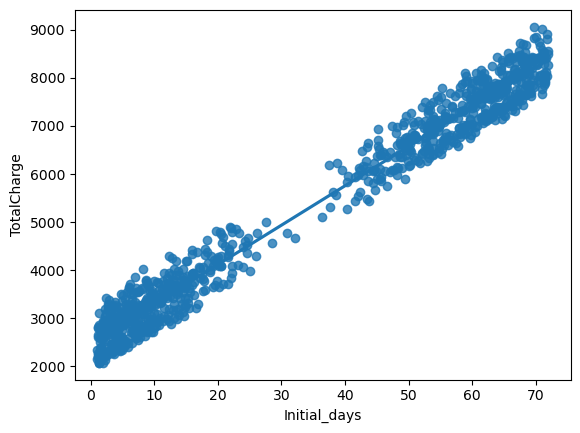

In [22]:
subset = med_data.sample(n=1000, random_state=500)

sns.regplot(x='Initial_days',
           y='TotalCharge',
           data=subset,
           ci=None)

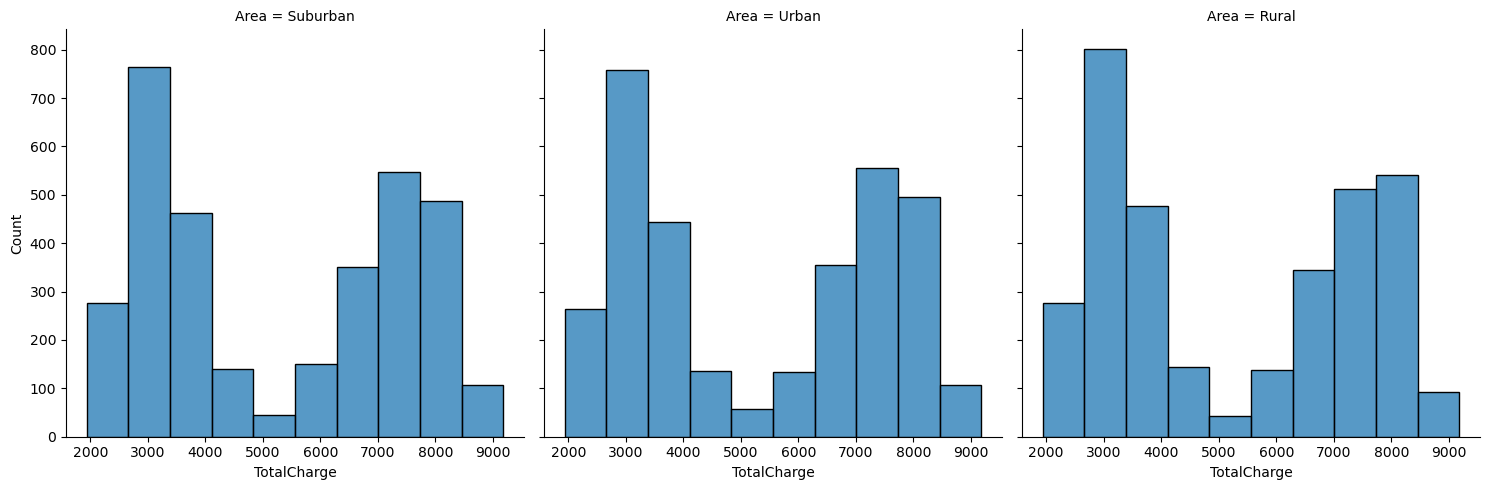

In [23]:
sns.displot(x='TotalCharge',
            col='Area',
            bins=10,
            data=med_data)

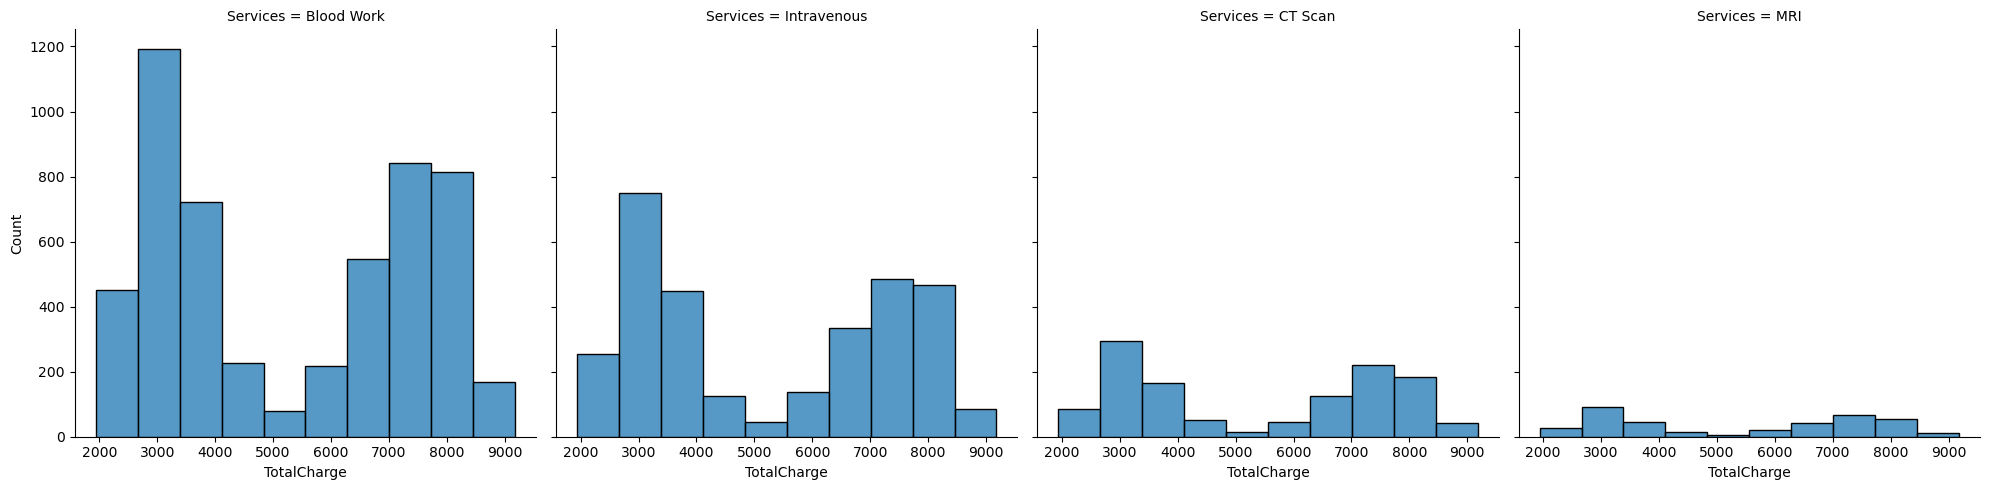

In [24]:
sns.displot(x='TotalCharge',
            col='Services',
            bins=10,
            data=med_data)

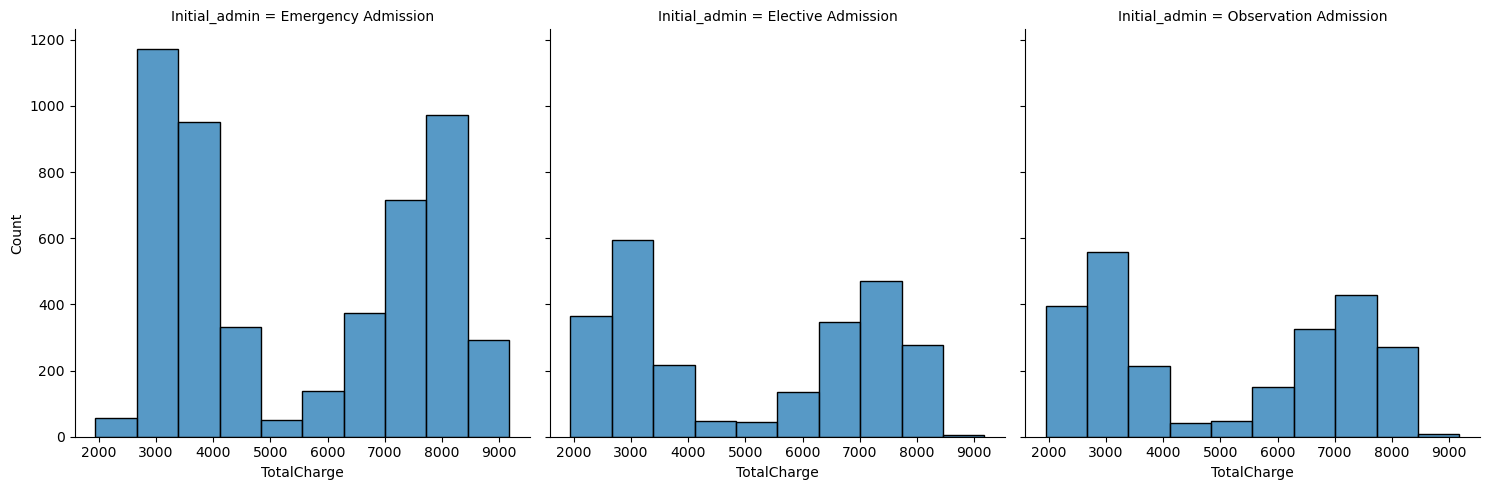

In [25]:
sns.displot(x='TotalCharge',
            col='Initial_admin',
            bins=10,
            data=med_data)

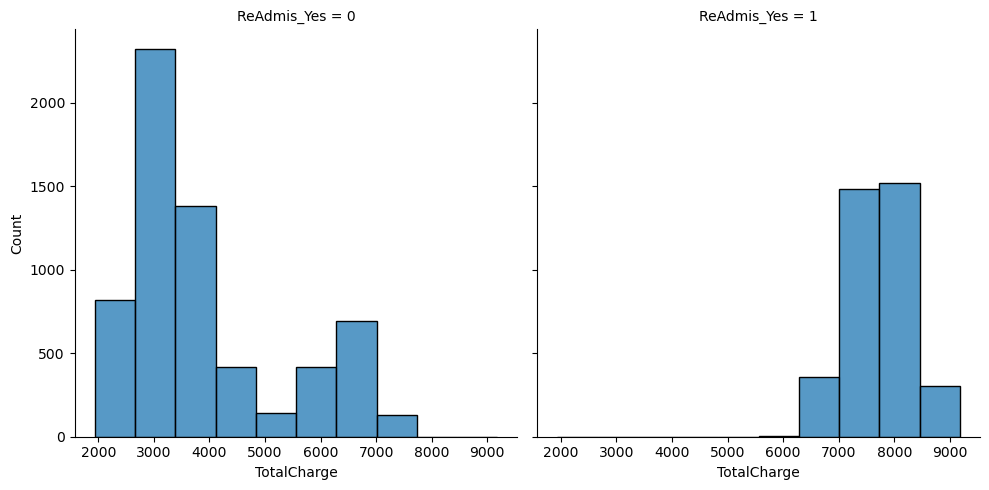

In [26]:
sns.displot(x='TotalCharge',
            col='ReAdmis_Yes',
            bins=10,
            data=med_data)

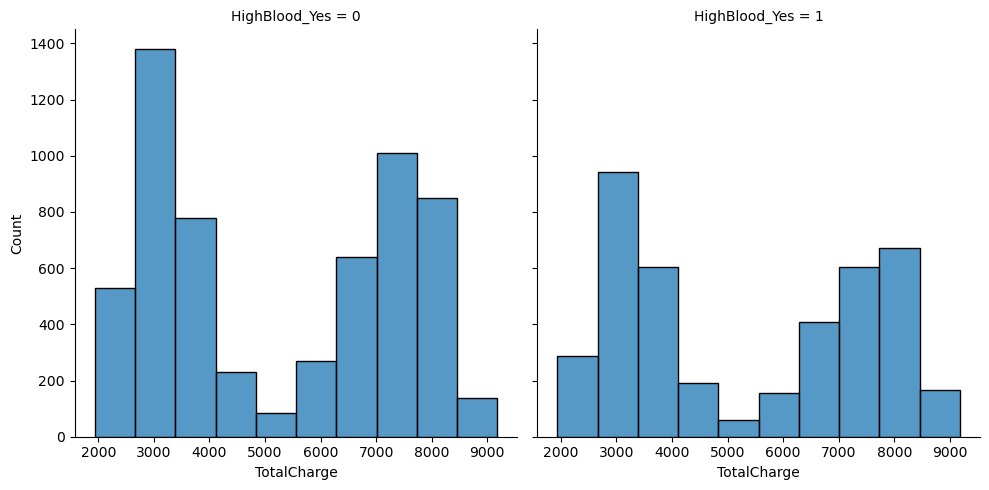

In [27]:
sns.displot(x='TotalCharge',
            col='HighBlood_Yes',
            bins=10,
            data=med_data)

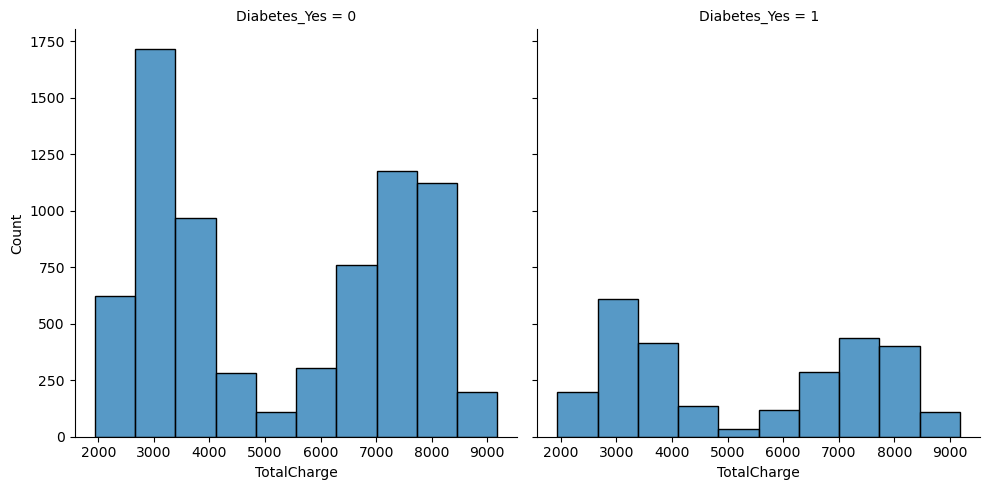

In [28]:
sns.displot(x='TotalCharge',
            col='Diabetes_Yes',
            bins=10,
            data=med_data)

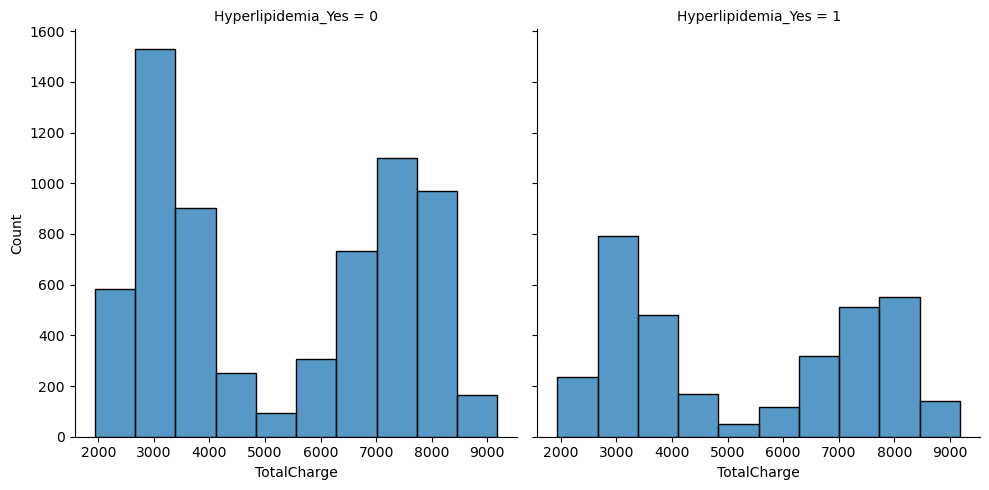

In [29]:
sns.displot(x='TotalCharge',
            col='Hyperlipidemia_Yes',
            bins=10,
            data=med_data)

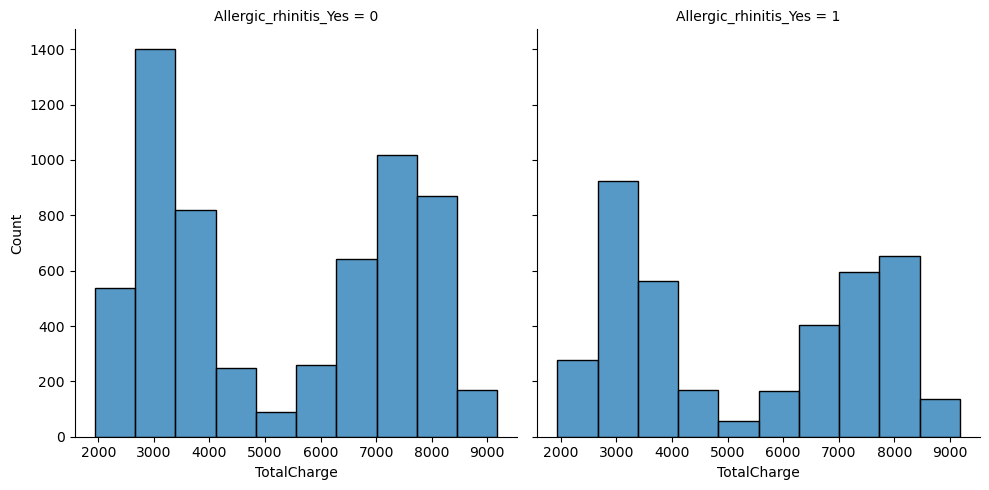

In [30]:
sns.displot(x='TotalCharge',
            col='Allergic_rhinitis_Yes',
            bins=10,
            data=med_data)

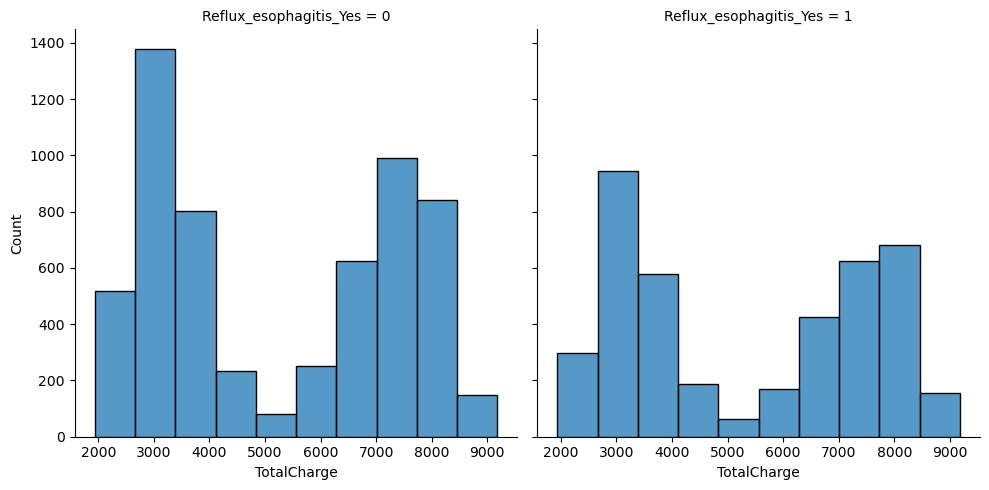

In [31]:
sns.displot(x='TotalCharge',
            col='Reflux_esophagitis_Yes',
            bins=10,
            data=med_data)

In [32]:
#remove final columns not needed
med_data.drop(['CaseOrder', 'Population', 'Area', 'Marital', 'Gender', 
       'Soft_drink', 'Initial_admin', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'BackPain', 'Anxiety',
       'Asthma', 'Services'], 
               axis=1, 
               inplace=True)

#export CSV file
med_data.to_csv("~/Documents/WGU/D208 - Predictive Modeling/208 - medical_clean_final.csv")

In [33]:
#compare RSE of both models

mse_all = model_TotalCharge_all.mse_resid
rse_all = np.sqrt(mse_all)

mse_rdc = model_TotalCharge_reduced.mse_resid
rse_rdc = np.sqrt(mse_rdc)

print("RSE for Initial Model: ", rse_all)
print("RSE for Reduced Model: ", rse_rdc)

RSE for Initial Model:  121.8229637294534
RSE for Reduced Model:  121.84053033291282


In [34]:
#model parameters: Intercept + Slope

print(model_TotalCharge_reduced.params)

Intercept                 1592.012142
Initial_days                82.288713
Comp_risk_numeric          226.902673
IA_Emergency               515.766932
ReAdmis_Yes                -14.929255
HighBlood_Yes              110.153221
Diabetes_Yes                74.986395
Hyperlipidemia_Yes          89.992864
Allergic_rhinitis_Yes       65.577249
Reflux_esophagitis_Yes      62.447160
dtype: float64


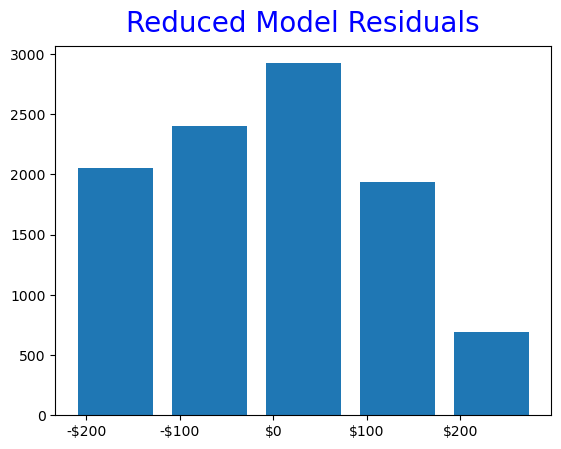

In [35]:
plt.hist(model_TotalCharge_reduced.resid, rwidth=0.8, bins=5)
plt.title('Reduced Model Residuals', fontsize=20, pad=10, color='blue')
plt.xticks([-200, -100, 0, 100, 200], ['-$200', '-$100', '$0', '$100', '$200'])
plt.show()